<a href="https://colab.research.google.com/github/stinkmtul/Kuliah-Data_Mining/blob/main/Evaluation/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Preferensi Konsumen dalam Meningkatkan Daya Saing: Studi Kasus Chocolate Ratings**

#**Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset chocolate ratings ini adalah untuk menganalisis preferensi konsumen dalam meningkatkan kualitas produk dari segi rasa, tekstur sehingga dapat meningkatkan kepuasan pelanggan. Selain itu, menganalisis persaingan industri dengan membandingkan rating produk mereka dengan pesaing, agar dapat mengidentifikasi kekuatan dan kelemahan produk mereka sehingga dapat menetapkan strategi untuk meningkatkan daya saing.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah kemungkinan pasar coklat menjadi semakin kompetitif dengan pergeseran dalam preferensi konsumen seiring berjalannya waktu. Oleh karena itu, perusahaan perlu memahami lebih baik bagaimana produk mereka dibandingkan dengan pesaing agar dapat menetapkan strategi untuk dapat terus bertahan dipasar.

##**Data Mining Goals**

Tujuan dari data mining dataset ini adalah untuk menganalisis terkait preferensi konsumen terhadap berbagai atribut produk cokelat, dengan harapan dapat meningkatkan kualitas produk dan meningkatkan kepuasan pelanggan. Selain itu, analisis data ini juga bertujuan untuk mengeksplorasi dan memahami dinamika persaingan industri dengan membandingkan rating produk, agar dapat mengidentifikasi dan memperbaiki kelemahan untuk meningkatkan daya saing.

##**Project Plan**

Dalam menganalisis dataset ini, langkah-langkah dimulai dengan memahami dataset secara mendalam, termasuk struktur dan atribut yang ada. Setelah itu, data akan dibersihkan dan disiapkan untuk analisis dengan menangani masalah seperti data yang hilang, duplikat, dan tidak valid. Selanjutnya, analisis akan difokuskan pada preferensi konsumen, dengan mencari pola atau tren terkait preferensi rasa, tekstur, atau atribut lain yang mempengaruhi rating produk cokelat. Evaluasi dilakukan terhadap metode analisis yang digunakan untuk memastikan kualitas hasil analisis, sementara visualisasi data digunakan untuk menyajikan temuan secara jelas. Hasil analisis akan didokumentasikan dan disampaikan kepada pemangku kepentingan untuk mendukung pengambilan keputusan yang didasarkan pada informasi yang akurat dan relevan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

**Deskripsi Sumber Data :**

Dataset yang digunakan berasal dari Kaggle, platform yang terkenal dalam menyediakan berbagai dataset untuk berbagai keperluan analisis dan penelitian. Dataset ini berisi informasi tentang peringkat atau rating berbagai jenis cokelat berdasarkan review yang diberikan oleh para ahli. Data ini sangat berguna untuk menganalisis preferensi konsumen terhadap berbagai atribut produk cokelat, seperti rasa, tekstur, dan kualitas secara umum.

**Link Sumber Data :**
https://www.kaggle.com/datasets/joebeachcapital/chocolate-ratings

In [2]:
data_url = 'https://raw.githubusercontent.com/stinkmtul/Kuliah-Data_Mining/main/chocolate.csv'
df = pd.read_csv(data_url)
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


##**Describe Data**

####Informasi Dasar

In [ ]:
print("Jumlah baris :", len(df))
print("Jumlah kolom :", len(df.columns))

Jumlah baris : 2530
Jumlah kolom : 10


Dapat dilihat bahwa dataset chocolate ratings memiliki 2530 baris data. Ini berarti kita memiliki informasi tentang 2530 contoh atau hal-hal yang diamati dalam dataset tersebut. Selain itu, dataset ini juga memiliki 10 kolom. Ini berarti untuk setiap contoh yang diamati, kita memiliki informasi tentang 10 hal yang berbeda seperti nama produk, produsen, negara asal, dll

####Informasi Lanjutan

In [ ]:
print('Informasi lengkap tentang dataset')
df.info()

Informasi lengkap tentang dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   int64  
 1   company_manufacturer              2530 non-null   object 
 2   company_location                  2530 non-null   object 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   object 
 5   specific_bean_origin_or_bar_name  2530 non-null   object 
 6   cocoa_percent                     2530 non-null   object 
 7   ingredients                       2443 non-null   object 
 8   most_memorable_characteristics    2530 non-null   object 
 9   rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


**Dapat disimpulkan bahwa :**

- **ref :** Ini adalah kolom yang menyimpan nomor referensi atau identifikasi unik untuk setiap entri. Tipe data kolom ini adalah integer (int64).

- **company_manufacturer :** Kolom ini berisi nama perusahaan atau produsen cokelat. Tipe data kolom ini adalah objek (object).

- **company_location :** Kolom ini berisi lokasi atau negara asal perusahaan atau produsen cokelat. Tipe data kolom ini adalah objek (object).

- **review_date :** Kolom ini berisi tahun dimana review atau penilaian dilakukan. Tipe data kolom ini adalah integer (int64).

- **country_of_bean_origin :** Kolom ini berisi wilayah atau negara asal biji kakao yang digunakan dalam pembuatan cokelat. Tipe data kolom ini adalah objek (object).

- **specific_bean_origin_or_bar_name :** Kolom ini berisi informasi tentang asal atau nama spesifik biji kakao atau bar cokelat. Tipe data kolom ini adalah objek (object).

- **cocoa_percent :** Kolom ini berisi persentase kakao dalam cokelat. Tipe data kolom ini adalah objek (object).

- **ingredients :** Kolom ini berisi informasi tentang bahan-bahan yang digunakan dalam pembuatan cokelat. Namun, ada beberapa entri yang memiliki nilai null. Tipe data kolom ini adalah objek (object).

- **most_memorable_characteristics :** Kolom ini berisi informasi tentang karakteristik yang paling diingat dari cokelat tersebut. Tipe data kolom ini adalah objek (object).

- **rating :** Kolom ini berisi rating atau peringkat yang diberikan untuk cokelat. Tipe data kolom ini adalah float (float64).

####Informasi Statistik Deskriptif

In [ ]:
print('Informasi lengkap tentang dataset')
df.describe()

Informasi lengkap tentang dataset


,ref,review_date,rating
count,2530.000000,2530.000000,2530.000000
mean,1429.800791,2014.374308,3.196344
std,757.648556,3.968267,0.445321
min,5.000000,2006.000000,1.000000
25%,802.000000,2012.000000,3.000000
50%,1454.000000,2015.000000,3.250000
75%,2079.000000,2018.000000,3.500000
max,2712.000000,2021.000000,4.000000


Dari data yang telah disajikan, maka dapat disimpulkan bahwa :

- **Ref**: Ini adalah nomor referensi atau identifikasi unik untuk setiap ulasan. Ini digunakan untuk mengidentifikasi setiap entri atau data secara unik dalam dataset.

- **Review_date**: Kolom ini berisi tanggal ketika ulasan diberikan. Rentang tahun ulasan berkisar antara 2006 dan 2021, dengan rata-rata ulasan diberikan sekitar tahun 2014. Quartile menunjukkan distribusi ulasan dalam rentang waktu tersebut adalah 25% ulasan diberikan sebelum tahun 2012, 50% ulasan diberikan pada tahun 2015, dan 75% ulasan diberikan pada tahun 2018.

- **Rating**: Kolom ini berisi peringkat atau penilaian yang diberikan oleh pengulas, dengan rentang peringkat dari 1 hingga 4. Rata-rata peringkat adalah sekitar 3.19. Quartile menunjukkan bahwa distribusi rating 25% ulasan memiliki rating kurang dari 3, 25% ulasan memiliki rating lebih dari 3.5. Median (50%) adalah 3.25, yang merupakan nilai tengah dari seluruh rentang peringkat.

##**Exploratory Data Analysis**

Bagaimana distribusi jumlah cokelat berdasarkan nilai rating di dalam dataset ini?

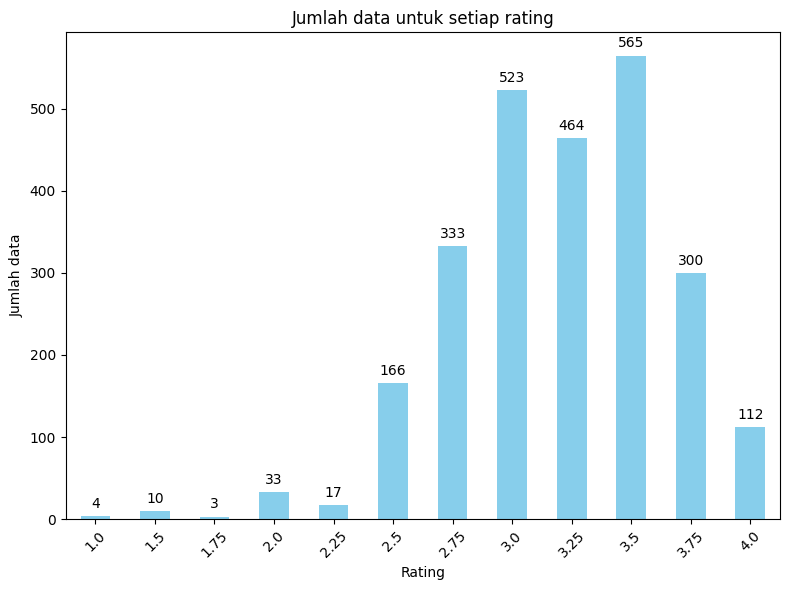

In [ ]:
# Menghitung jumlah data untuk setiap rating
jumlah_data_per_rating = df['rating'].value_counts().sort_index()

# Membuat diagram batang
plt.figure(figsize=(8, 6))
jumlah_data_per_rating.plot(kind='bar', color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Rating')
plt.ylabel('Jumlah data')
plt.title('Jumlah data untuk setiap rating')

# Menampilkan nilai di atas setiap batang
for i, v in enumerate(jumlah_data_per_rating):
    plt.text(i, v + 10, str(v), ha='center')

plt.xticks(rotation=45)  # Memutar label rating untuk mencegah tumpang tindih

# Menampilkan diagram
plt.tight_layout()
plt.show()

Dari visualisasi yang ditampilkan, kita dapat mengamati bahwa:

- **Rating 1.0 :** memiliki jumlah data sekitar 4, yang menunjukkan bahwa ada 4 cokelat dalam dataset yang mendapatkan rating sekitar 1.0.

- **Rating 1.5 :** memiliki jumlah data sekitar 10, yang berarti terdapat 10 cokelat dalam dataset yang mendapatkan rating sekitar 1.5.

- **Rating 1.75 :** memiliki jumlah data sekitar 3, yang menunjukkan bahwa ada 3 cokelat dalam dataset yang mendapatkan rating sekitar 1.75.

- **Rating 2.0 :** memiliki jumlah data sekitar 33, menunjukkan bahwa ada beberapa cokelat dalam dataset yang mendapatkan rating sekitar 2.0.

- **Rating 2.25 :** memiliki jumlah data sekitar 17, menunjukkan bahwa ada beberapa cokelat dalam dataset yang mendapatkan rating sekitar 2.25.

- **Rating 2.5 :** memiliki jumlah data sekitar 166, yang menunjukkan bahwa ada banyak cokelat dalam dataset yang mendapatkan rating sekitar 2.5.

- **Rating 2.75 :** memiliki jumlah data sekitar 333, menunjukkan bahwa ada banyak cokelat dalam dataset yang mendapatkan rating sekitar 2.75.

- **Rating 3.0 :** memiliki jumlah data sekitar 523, yang menunjukkan bahwa ada banyak cokelat dalam dataset yang mendapatkan rating sekitar 3.0.

- **Rating 3.25 :** memiliki jumlah data sekitar 464, menunjukkan bahwa ada banyak cokelat dalam dataset yang mendapatkan rating sekitar 3.25.

- **Rating 3.5 :** memiliki jumlah data sekitar 565, yang menunjukkan bahwa ada banyak cokelat dalam dataset yang mendapatkan rating sekitar 3.5.

- **Rating 3.75 :** memiliki jumlah data sekitar 300, menunjukkan bahwa ada beberapa cokelat dalam dataset yang mendapatkan rating sekitar 3.75.

- **Rating 4.0 :** memiliki jumlah data sekitar 112, menunjukkan bahwa ada beberapa cokelat dalam dataset yang mendapatkan rating sekitar 4.0.


Bagaimana rata rata rating cokelat pada perusahaan manufaktur? manakah perusahaan yang memiliki rata rata rating tertinggi, dan manakah yang memiliki rata rata rating terendah?

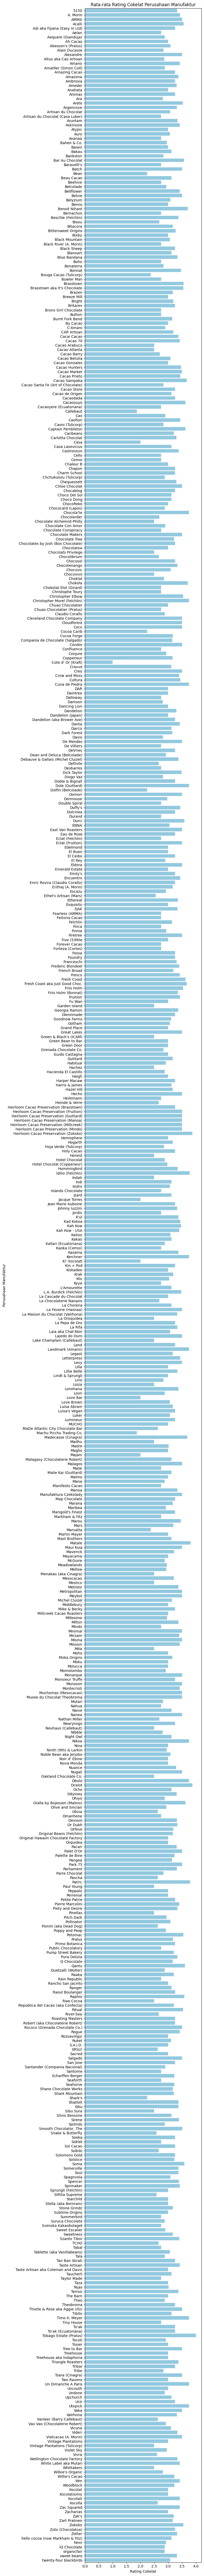

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat data dari URL ke dalam DataFrame
df = pd.read_csv(data_url)

# Menghitung rata-rata rating cokelat untuk setiap perusahaan manufaktur
mean_ratings = df.groupby('company_manufacturer')['rating'].mean().reset_index()

# Plot bar plot untuk menunjukkan rata-rata rating cokelat perusahaan manufaktur
plt.figure(figsize=(8, 100))
sns.barplot(data=mean_ratings, x='rating', y='company_manufacturer', color='skyblue')
plt.title('Rata-rata Rating Cokelat Perusahaan Manufaktur')
plt.xlabel('Rating Cokelat')
plt.ylabel('Perusahaan Manufaktur')
plt.tight_layout()  # Untuk menghindari potongan label
plt.show()


Dari data yang telah disajikan, terlihat bahwa perusahaan Tobago Estate (Pralus) memperoleh rata-rata rating tertinggi untuk produk cokelat, sementara perusahaan Cote d'Or (Kraft) mendapatkan rata-rata rating terendah.

Apa komposisi bahan campuran yang paling umum digunakan dalam produk cokelat dan bagaimana rata-rata rating produk cokelat dengan komposisi tersebut? Selain itu, adakah kombinasi bahan tertentu yang menghasilkan rating lebih tinggi daripada yang lain? Bagaimana perbandingannya dengan komposisi bahan yang umum digunakan?

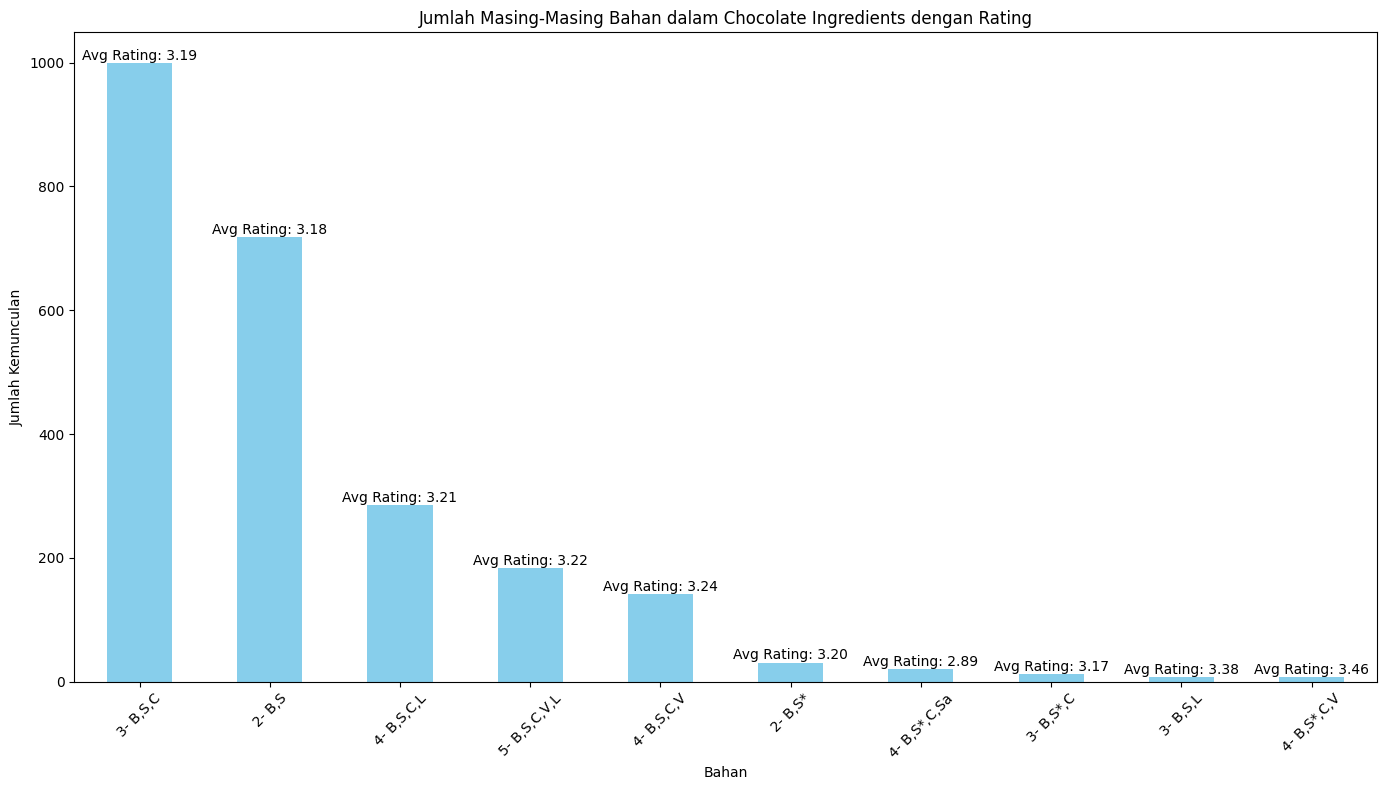

In [ ]:
# Menggabungkan semua entri dalam kolom "ingredients" menjadi satu string
all_ingredients = ', '.join(df['ingredients'].dropna())

# Membuat DataFrame dari kata-kata dalam kolom "ingredients"
ingredients_df = pd.DataFrame(all_ingredients.split(', '), columns=['Ingredient'])

# Menggabungkan DataFrame ingredients_df dengan DataFrame df untuk mendapatkan rating setiap bahan
ingredients_df['Rating'] = df['rating']

# Menghitung jumlah kemunculan setiap bahan
ingredient_counts = ingredients_df['Ingredient'].value_counts().sort_values(ascending=False)

# Mengambil 10 bahan teratas
top_ingredients = ingredient_counts.head(10)

# Membuat bar plot
plt.figure(figsize=(14, 8))
top_ingredients.plot(kind='bar', color='skyblue')
plt.title('Jumlah Masing-Masing Bahan dalam Chocolate Ingredients dengan Rating')
plt.xlabel('Bahan')
plt.ylabel('Jumlah Kemunculan')

# Menambahkan anotasi rating di atas setiap bar
for i, count in enumerate(top_ingredients):
    ingredient = top_ingredients.index[i]
    avg_rating = ingredients_df[ingredients_df['Ingredient'] == ingredient]['Rating'].mean()
    plt.text(i, count + 5, f'Avg Rating: {avg_rating:.2f}', ha='center', color='black', fontsize=10)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Dari analisis yang telah dilakukan, dapat disimpulkan bahwa komposisi bahan campuran cokelat yang paling umum digunakan adalah campuran dari Biji Kakao (B), Gula (S), dan Mentega Kakao (C), ditandai dengan simbol (B, S, C). Rata-rata rating produk cokelat dengan komposisi ini adalah sekitar 3.19.

Namun, terdapat beberapa kombinasi bahan yang menghasilkan rating lebih tinggi daripada yang lain. Misalnya, rating tertinggi diperoleh dari campuran bahan Biji Kakao (B), Pemanis selain gula tebu atau gula bit (S*), Mentega Kakao (C), dan Vanili (V), yaitu dengan rating sekitar 3.46. Hal ini menunjukkan bahwa penambahan bahan tambahan seperti Vanili dapat meningkatkan kualitas dan rating produk cokelat

Apa faktor-faktor yang mungkin memengaruhi perubahan rating cokelat dari waktu ke waktu

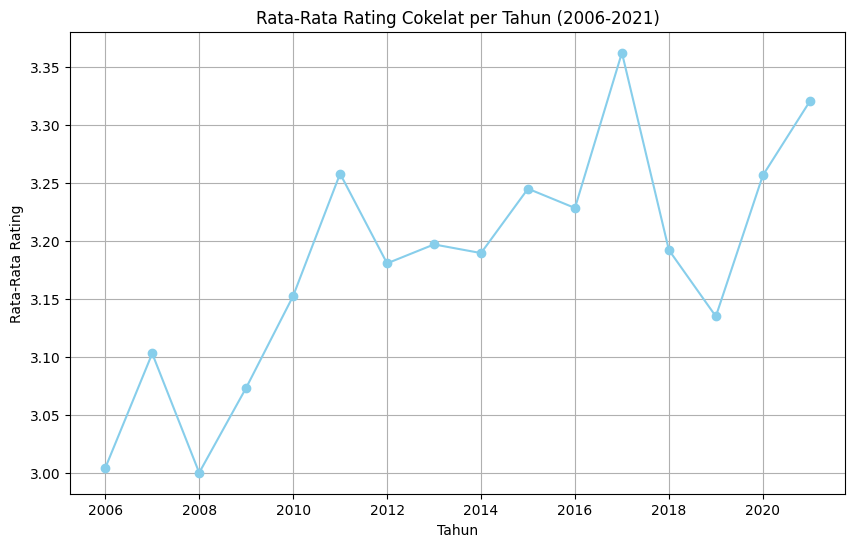

In [ ]:
import pandas as pd

# Menghitung rata-rata rating untuk setiap tahun
average_rating_per_year = df.groupby('review_date')['rating'].mean()

# Membuat plot rata-rata rating per tahun
average_rating_per_year.plot(kind='line', marker='o', figsize=(10, 6), color='skyblue')

# Menambahkan label dan judul
plt.title('Rata-Rata Rating Cokelat per Tahun (2006-2021)')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Rating')
plt.grid(True)
plt.show()


Dari visualisasi di atas, terlihat bahwa rata-rata rating cokelat cenderung meningkat seiring berjalannya waktu dari tahun 2006 hingga 2021. Ini menunjukkan bahwa cokelat yang diulas memiliki kecenderungan mendapatkan penilaian yang lebih baik dari tahun ke tahun, yang mungkin mencerminkan peningkatan kualitas produk atau perubahan preferensi konsumen terhadap cokelat. Namun, terdapat 2 periode penurunan rating antara tahun 2012 - 2016 dan 2018 - 2019. Penurunan tersebut mungkin disebabkan oleh berbagai faktor, seperti perubahan cara penilaian atau standar penilaian, perubahan selera atau kebiasaan konsumen, masalah dalam proses produksi atau kualitas produk, atau kondisi ekonomi dan keuangan perusahaan yang tidak stabil.

##**Verify Data Quality**

####Missing Values

In [ ]:
# Memeriksa nilai kosong pada setiap kolom
missing_values = df.isnull().sum()

# Menampilkan kolom-kolom dengan nilai kosong (jika ada)
if missing_values.any():
    print("Ada nilai kosong dalam dataset:")
    print(missing_values)
else:
    print("Tidak ada nilai kosong dalam dataset.")


Ada nilai kosong dalam dataset:
ref                                  0
company_manufacturer                 0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         87
most_memorable_characteristics       0
rating                               0
dtype: int64


Dari informasi yang disajikan, terlihat bahwa terdapat kekosongan data dalam dataset, khususnya pada kolom 'ingredients'. Terdapat 87 baris yang tidak berisi informasi tentang bahan-bahan yang digunakan dalam pembuatan cokelat.

####Outliers Values

<ipython-input-11-4c6e7f4cd747>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_date', y='rating', data=df, palette='Set2')


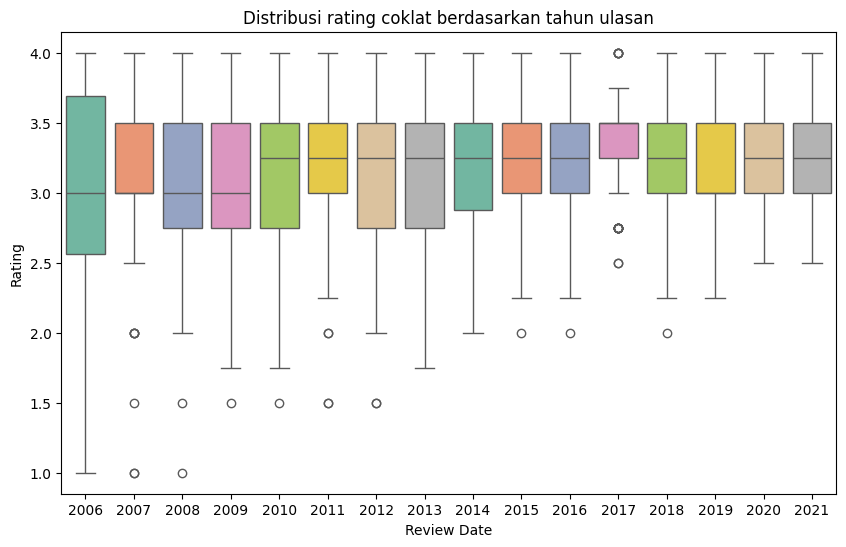

In [ ]:
df = pd.read_csv(data_url)

# Set up the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_date', y='rating', data=df, palette='Set2')
plt.title('Distribusi rating coklat berdasarkan tahun ulasan')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.show()

Dari visualisasi di atas, dapat disimpulkan bahwa pada rentang tahun antara 2007 dengan 2010, terdapat anomali di mana sebagian besar data memiliki rating di atas 1.5. Namun, ada beberapa data yang memiliki rating 1.5 atau lebih rendah, yang dianggap sebagai outlier atau bagian kecil dari data yang terkumpul pada tahun tersebut. Hal ini menunjukkan adanya variasi atau ketidakteraturan dalam distribusi rating cokelat selama periode tersebut

####Duplicated Values

In [ ]:
duplicated_data = df[df.duplicated()]
if not duplicated_data.empty:
    print("Data duplikat dalam DataFrame:")
    print(duplicated_data)
else:
    print("Tidak ada data duplikat dalam DataFrame.")

Tidak ada data duplikat dalam DataFrame.


Seperti yang telah terlihat sebelumnya, dataset cokelat ini tidak memiliki data duplikat di dalamnya.

#**Data Cleaning**

#####**Pengecekkan Missing Values**

Pengecekan missing value dilakukan untuk mengetahui apakah suatu kolom dalam dataset memiliki nilai yang kosong atau tidak lengkap

In [3]:
print((df.isna().sum() / len(df)) * 100)

ref                                 0.000000
company_manufacturer                0.000000
company_location                    0.000000
review_date                         0.000000
country_of_bean_origin              0.000000
specific_bean_origin_or_bar_name    0.000000
cocoa_percent                       0.000000
ingredients                         3.438735
most_memorable_characteristics      0.000000
rating                              0.000000
dtype: float64


Pada kolom ***ingredients***, sebanyak 3% dari seluruh entri terisi dengan nilai kosong.

In [4]:
df[df['ingredients'].isnull()]

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
85,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70%,NaN,"raisins, pungent",3.00
86,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70%,NaN,"few grits, blackcherry, licorice",3.50
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100%,NaN,"very nutty, very bitter",1.75
293,81,Bonnat,France,2006,Blend,One Hundred,100%,NaN,"acidic, bitter, dry",1.50
323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100%,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...
2424,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100%,NaN,"bland, mild fruit, strong bitter",2.00
2425,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90%,NaN,"some fruit, strong bitter",2.00
2426,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75%,NaN,"cocoa,earthy,very astringent",3.00
2447,733,Whittakers,New Zealand,2011,Ghana,Ghana,72%,NaN,"sticky, dry, vanilla dominates",2.50


#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom ***Ingredients*** sebanyak 3% dan kurang dari 70%, maka kolom tersebut tidak wajib untuk dihapus dan Sebagai gantinya, akan dilakukan imputasi nilai-nilai yang hilang menggunakan metode statistik

#####**Imputasi Missing Values**

In [5]:
df['ingredients'].dropna().describe()

count         2443
unique          21
top       3- B,S,C
freq           999
Name: ingredients, dtype: object

Mengisi nilai-nilai yang hilang (missing values) dalam kolom "ingredients" dengan nilai modus (mode) dari kolom tersebut, karena kolom tersebut termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [6]:
df['ingredients'] = df['ingredients'].fillna(df['ingredients'].mode()[0])

#####**Pengecekkan Ulang**

In [7]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
ref,0.0
company_manufacturer,0.0
company_location,0.0
review_date,0.0
country_of_bean_origin,0.0
specific_bean_origin_or_bar_name,0.0
cocoa_percent,0.0
ingredients,0.0
most_memorable_characteristics,0.0
rating,0.0


###**Penanganan Duplicated Values**


Penanganan nilai duplikasi berguna karena dengan menghilangkan nilai duplikat, kita dapat menghindari perhitungan yang tidak akurat dan analisis yang salah

#####**Pengecekkan Nilai Duplikat**

In [8]:
df[df.duplicated()]

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating


#####**Hapus Nilai Duplikat**

In [9]:
df = df.drop_duplicates()

###**Penanganan Outliers**

Penanganan outliers penting karena outliers dapat memengaruhi analisis statistik dan pemodelan data dengan cara yang tidak diinginkan. Outliers dapat menyebabkan bias dalam perkiraan dan membuat model yang kurang akurat. Dengan mengidentifikasi dan menangani outliers, kita dapat meningkatkan kualitas analisis data dan membuat prediksi yang lebih andal

#####**Pengecekkan Outliers**

In [10]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
ref,0.000000
review_date,0.000000
rating,1.976285


Terdapat outliers pada kolom ***rating*** sebesar 1%

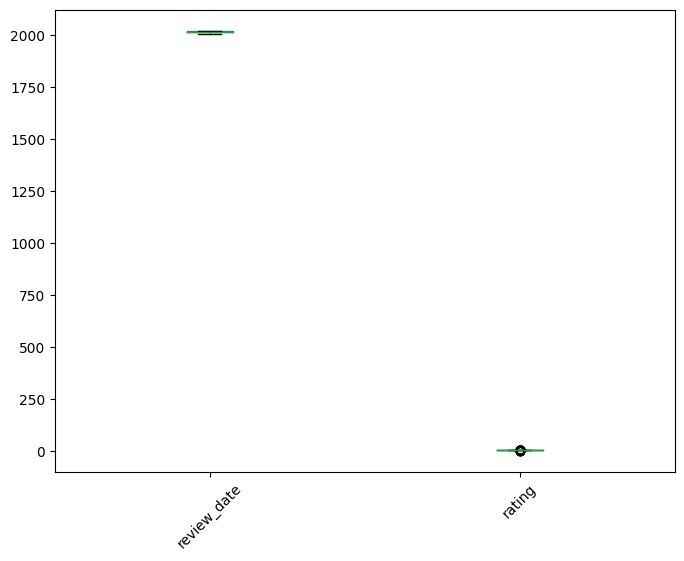

In [11]:
boxplot = df.drop('ref', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Hapus Outliers**

Penghapusan baris yang mengandung outliers pada kolom ***rating*** dilakukan karena persentase outliersnya kurang dari 10%.

In [12]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

#####**Imputasi Outliers**

Persentase outliers untuk semua kolom adalah 0.0, tidak ada nilai outliers yang terdeteksi dalam data, sehingga tidak ada kebutuhan untuk melakukan imputasi outliers.

#####**Pengecekkan Ulang**

In [13]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
ref,0.0
review_date,0.0
rating,0.0


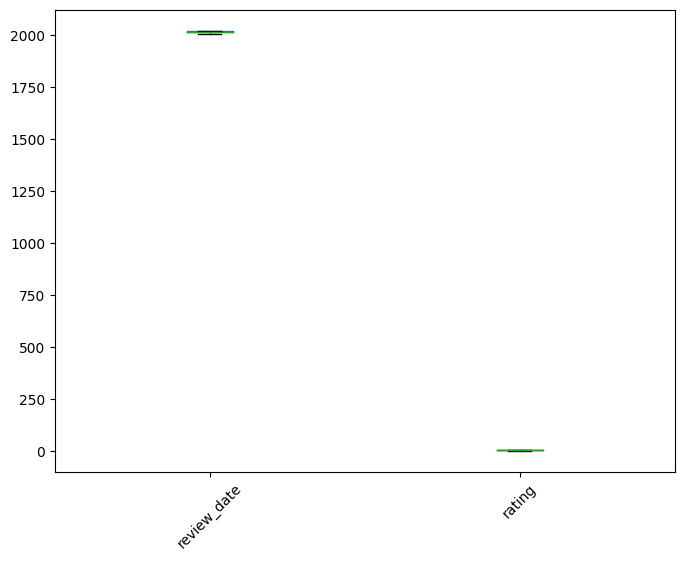

In [14]:
boxplot = df.drop('ref', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

Dengan melakukan rekayasa fitur (feature engineering) kita dapat meningkatkan kualitas model yang dibangun dari data. Dengan menggabungkan, mentransformasi, atau mengekstraksi fitur-fitur baru dari data yang ada, kita dapat meningkatkan keakuratan model, mengurangi overfitting, dan memperoleh wawasan yang lebih dalam tentang pola-pola yang terdapat dalam data

In [15]:
# Definisikan fungsi untuk kategorisasi rating
def categorize_rating(rating):
    if rating >= 3.00:
        return 'tinggi'
    else:
        return 'rendah'

# Terapkan fungsi kategorisasi pada variabel sementara dan simpan ke dalam kolom baru
df['rating_category'] = df['rating'].apply(categorize_rating)

Mengelompokkan rating ke dalam kategori tertentu, seperti "rendah" atau "tinggi", bertujuan untuk menyederhanakan informasi agar lebih mudah dipahami. Dengan cara ini, kompleksitas nilai rating yang mungkin bervariasi menjadi lebih terstruktur dan dapat dengan cepat diserap dan dipahami

#**Konversi nilai**

Mengkonversi tipe data kolom "cocoa_percent" menjadi nilai desimal dilakukan untuk memudahkan pengkategorian dan pengelompokan.

In [16]:
# Hapus karakter non-numerik dari nilai-nilai dalam kolom 'cocoa_percent'
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%', '')

# Konversi nilai-nilai dalam kolom 'cocoa_percent' menjadi float
df['cocoa_percent'] = df['cocoa_percent'].astype(float)

###**Pengecekkan Hasil**

In [17]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,rating_category
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,tinggi
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,tinggi
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,tinggi
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,tinggi
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,tinggi


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

Dengan melakukan penghilangan fitur fitur yang kurang releven, dapat membantu kita untuk fokus pada fitur-fitur yang memiliki dampak signifikan terhadap tujuan analisis atau pemodelan data yang sedang dilakukan.

In [18]:
df = df.drop(['ref','company_manufacturer','company_location', 'review_date', 'country_of_bean_origin', 'specific_bean_origin_or_bar_name','most_memorable_characteristics'], axis=1)

###**Pengecekkan Hasil**

In [19]:
df.head()

,cocoa_percent,ingredients,rating,rating_category
0,76.0,"3- B,S,C",3.25,tinggi
1,76.0,"3- B,S,C",3.50,tinggi
2,76.0,"3- B,S,C",3.75,tinggi
3,68.0,"3- B,S,C",3.00,tinggi
4,72.0,"3- B,S,C",3.00,tinggi


#**Data Transformation**

###**Mapping**


Mapping pada data transformation dilakukan agar kita dapat mengubah nilai-nilai dalam dataset menjadi bentuk yang lebih mudah dimengerti dan sesuai dengan keperluan analisis atau pemodelan

In [20]:
df['rating_category'] = df['rating_category'].map({'rendah': 0, 'tinggi': 1}).astype(int)

In [21]:
df

,cocoa_percent,ingredients,rating,rating_category
0,76.0,"3- B,S,C",3.25,1
1,76.0,"3- B,S,C",3.50,1
2,76.0,"3- B,S,C",3.75,1
3,68.0,"3- B,S,C",3.00,1
4,72.0,"3- B,S,C",3.00,1
...,...,...,...,...
2525,80.0,"4- B,S*,C,Sa",2.75,0
2526,75.0,"3- B,S,C",3.75,1
2527,75.0,"3- B,S,C",3.00,1
2528,70.0,"3- B,S,C",3.25,1


###**Encoding**

Encoding dilakukan untuk mengubah jenis data yang berupa kategori menjadi format numerik. Hal ini diperlukan karena sebagian besar algoritma pemodelan data membutuhkan data dalam format numerik untuk dapat bekerja

In [22]:
# Melakukan one-hot encoding untuk kolom 'ingredients'
df = pd.get_dummies(df, columns=['ingredients'])

###**Pengecekkan Hasil**

In [23]:
df.head()

,cocoa_percent,rating,rating_category,ingredients_1- B,"ingredients_2- B,C","ingredients_2- B,S","ingredients_2- B,S*","ingredients_3- B,S*,C","ingredients_3- B,S*,Sa","ingredients_3- B,S,C",...,"ingredients_4- B,S*,C,V","ingredients_4- B,S*,V,L","ingredients_4- B,S,C,L","ingredients_4- B,S,C,Sa","ingredients_4- B,S,C,V","ingredients_4- B,S,V,L","ingredients_5- B,S,C,L,Sa","ingredients_5- B,S,C,V,L","ingredients_5-B,S,C,V,Sa","ingredients_6-B,S,C,V,L,Sa"
0,76.0,3.25,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,76.0,3.50,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76.0,3.75,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,68.0,3.00,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,72.0,3.00,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from google.colab import files

# Simpan DataFrame ke dalam file CSV
df.to_csv('Data_Cleaned.csv', index=False)

# Download file CSV secara fisik
files.download('Data_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Import Library dan Resource yang akan digunakan**

**Core Library**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Library untuk Splitting Data**

In [26]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [27]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [29]:
data_url = '/content/Data_Cleaned.csv'
df = pd.read_csv(data_url)
df.head()

,cocoa_percent,rating,rating_category,ingredients_1- B,"ingredients_2- B,C","ingredients_2- B,S","ingredients_2- B,S*","ingredients_3- B,S*,C","ingredients_3- B,S*,Sa","ingredients_3- B,S,C",...,"ingredients_4- B,S*,C,V","ingredients_4- B,S*,V,L","ingredients_4- B,S,C,L","ingredients_4- B,S,C,Sa","ingredients_4- B,S,C,V","ingredients_4- B,S,V,L","ingredients_5- B,S,C,L,Sa","ingredients_5- B,S,C,V,L","ingredients_5-B,S,C,V,Sa","ingredients_6-B,S,C,V,L,Sa"
0,76.0,3.25,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,76.0,3.50,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76.0,3.75,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,68.0,3.00,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,72.0,3.00,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#**Select Modeling Techniques**

##**Naive Bayes:**

  Naive Bayes adalah algoritma klasifikasi yang berdasarkan pada teorema Bayes. Algoritma ini dianggap "naif" karena mengasumsikan bahwa semua fitur dalam dataset adalah independen satu sama lain, meskipun kenyataannya tidak selalu demikian.

  
  Hubungan dengan dataset :
  
  Naive Bayes dapat digunakan untuk mengklasifikasikan cokelat ke dalam kategori tertentu berdasarkan fitur-fiturnya seperti persentase kakao atau bahan-bahan yang digunakan dalam pembuatan cokelat. Contohnya, algoritma ini dapat membantu dalam memprediksi kategori rating cokelat berdasarkan atribut-atributnya.

#**K-Nearest Neighbors (KNN):**

  K-Nearest Neighbors adalah algoritma klasifikasi yang sederhana dan intuitif. Algoritma ini mengklasifikasikan sampel baru berdasarkan mayoritas kelas dari tetangga terdekatnya dalam ruang fitur.


  Hubungan dengan dataset :
  
  KNN dapat digunakan untuk mengidentifikasi kemiripan antara cokelat berdasarkan atribut-atributnya. Misalnya, dengan menggunakan persentase kakao dan bahan-bahan sebagai fitur-fitur, KNN dapat mengklasifikasikan cokelat baru ke dalam kategori rating yang mirip dengan cokelat-cokelat yang serupa berdasarkan atribut-atribut tersebut.

#**Decision Tree:**

  Decision Tree adalah algoritma pembelajaran yang merepresentasikan keputusan dalam bentuk struktur pohon. Setiap simpul dalam pohon mewakili keputusan berdasarkan fitur-fitur tertentu, dan setiap cabang mewakili hasil keputusan tersebut.


  Hubungan dengan dataset :
  
  Decision Tree dapat digunakan untuk memahami hubungan antara fitur-fitur cokelat dan ratingnya. Misalnya, pohon keputusan dapat memperlihatkan bahwa jika persentase kakao lebih dari 70%, maka rating cokelat cenderung lebih tinggi

#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

Tahap ini bertujuan untuk mempersiapkan dataset untuk proses pembuatan model. Pertama, dataset dibagi menjadi dua bagian: fitur (x) dan target (y). Fitur adalah variabel-variabel yang akan digunakan untuk memprediksi target atau label. Selanjutnya, dataset dibagi menjadi data latih dan data uji. Data latih digunakan untuk melatih model, sementara data uji digunakan untuk menguji kinerja model. Lalu, karena data lebih dari 1000 entri, maka akan menggunakan rasio 8:2, dengan 80% dari total data akan digunakan untuk melatih model, sementara 20% sisanya akan digunakan untuk menguji model.  Hal ini untuk memastikan bahwa model memiliki cukup data untuk belajar pola yang ada dalam data latih, sementara data uji memberikan pengujian yang cukup terhadap kinerja model pada data baru yang belum pernah dilihat sebelumnya








In [30]:
x = df.drop('rating_category', axis=1)
y = df['rating_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#####**Normalisasi Data**

Pada tahap ini normalisasi data digunakan untuk memastikan bahwa semua fitur dalam dataset memiliki skala yang seragam, sehingga tidak ada fitur yang mendominasi yang lainnya

In [31]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

###**Build and Train Model**

#####**Gaussian Naive Bayes**

Tahap ini adalah tahap membuat model Gaussian Naive Bayes (GNB) dan melatihnya menggunakan data latih yang sudah dinormalisasi (x_train_norm) dan label yang sesuai (y_train).

In [32]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

#####**K-Nearest Neighbor**

Tahap ini adalah tahap membuat model K-Nearest Neighbors (KNN) dan melatihnya menggunakan data latih yang sudah dinormalisasi (x_train_norm) dan label yang sesuai (y_train).

In [33]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#####**Decision Tree**

Tahap ini adalah tahap membuat model Decision Tree Classifier (DTC) dan melatihnya menggunakan data latih yang sudah dinormalisasi (x_train_norm) dan label yang sesuai (y_train).

In [34]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

###**Begins and Compare Predict**

Menggunakan model-model yang telah dilatih sebelumnya untuk membuat prediksi terhadap data uji. Setelah itu, hasil prediksi dari setiap model akan dibandingkan dengan nilai sebenarnya dalam data uji. Nilai sebenarnya yang dimaksud dalam konteks ini mengandung variabel target yang ingin diprediksi atau diklasifikasikan, yaitu nilai kategori rating.

In [35]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [36]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [37]:
combined_data.sample(10)

,cocoa_percent,rating,ingredients_1- B,"ingredients_2- B,C","ingredients_2- B,S","ingredients_2- B,S*","ingredients_3- B,S*,C","ingredients_3- B,S*,Sa","ingredients_3- B,S,C","ingredients_3- B,S,L",...,"ingredients_4- B,S,C,V","ingredients_4- B,S,V,L","ingredients_5- B,S,C,L,Sa","ingredients_5- B,S,C,V,L","ingredients_5-B,S,C,V,Sa","ingredients_6-B,S,C,V,L,Sa",rating_category,gnb_prediction,knn_prediction,dtc_prediction
98,70.0,3.50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
269,70.0,3.50,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
308,72.0,3.00,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
93,72.0,3.75,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
218,71.0,3.00,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
82,72.0,3.25,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
100,70.0,2.50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,65.0,3.00,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
336,77.0,3.50,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
155,70.0,3.75,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1


Dapat diamati bahwa prediksi rating cokelat dilakukan menggunakan tiga model, yaitu Gaussian Naive Bayes (gnb_prediction), K-Nearest Neighbors (knn_prediction), dan Decision Tree Classifier (dtc_prediction). Hasil prediksi dari ketiga model tersebut terdapat pada kolom 'gnb_prediction', 'knn_prediction', dan 'dtc_prediction'.

#Visualisasi Hasil Pemodelan

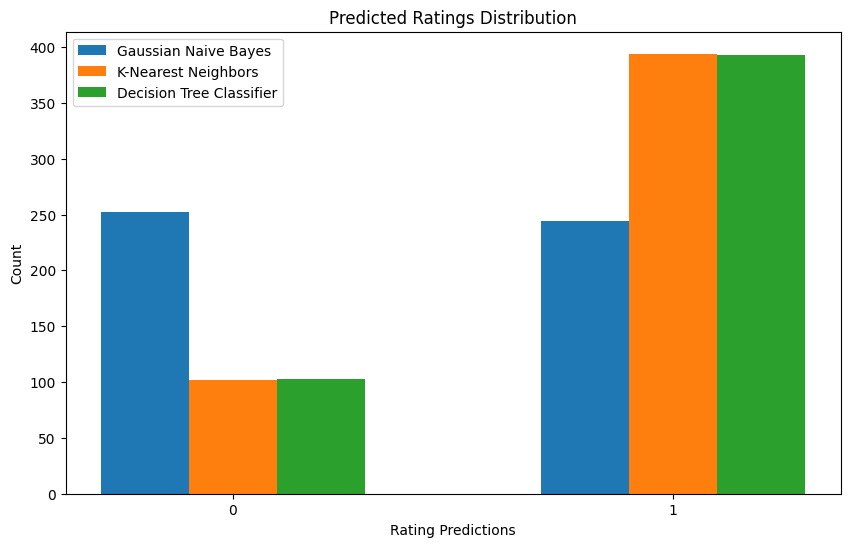

In [38]:
import matplotlib.pyplot as plt

# Contoh data prediksi dari model-model yang telah dilatih
gnb_predictions = combined_data['gnb_prediction']
knn_predictions = combined_data['knn_prediction']
dtc_predictions = combined_data['dtc_prediction']

# Menghitung jumlah kemunculan setiap nilai prediksi
gnb_counts = {i: gnb_predictions.tolist().count(i) for i in set(gnb_predictions)}
knn_counts = {i: knn_predictions.tolist().count(i) for i in set(knn_predictions)}
dtc_counts = {i: dtc_predictions.tolist().count(i) for i in set(dtc_predictions)}

# Mengambil kelas prediksi yang unik
labels = sorted(set(gnb_predictions.values.tolist() + knn_predictions.values.tolist() + dtc_predictions.values.tolist()))

# Menyiapkan data untuk plot
gnb_data = [gnb_counts.get(label, 0) for label in labels]
knn_data = [knn_counts.get(label, 0) for label in labels]
dtc_data = [dtc_counts.get(label, 0) for label in labels]

# Plot grafik batang
width = 0.2
x = range(len(labels))
plt.figure(figsize=(10, 6))
plt.bar(x, gnb_data, width, label='Gaussian Naive Bayes')
plt.bar([i + width for i in x], knn_data, width, label='K-Nearest Neighbors')
plt.bar([i + 2 * width for i in x], dtc_data, width, label='Decision Tree Classifier')
plt.xlabel('Rating Predictions')
plt.ylabel('Count')
plt.title('Predicted Ratings Distribution')
plt.xticks([i + width for i in x], labels)
plt.legend()
plt.show()

Visualisasi tersebut memberikan informasi tentang sebaran prediksi kategori nilai rating dari tiga model yang telah dilatih: Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier. Pada sumbu x, terdapat nilai-nilai prediksi yang unik, sedangkan sumbu y menampilkan jumlah kemunculan setiap nilai prediksi. Grafik batang ini memungkinkan pembandingan langsung antara model-model tersebut dalam hal bagaimana mereka memprediksi nilai-nilai rating tertentu.

# **Evaluation**

## **Evaluate Result**

###Confusion Matrix

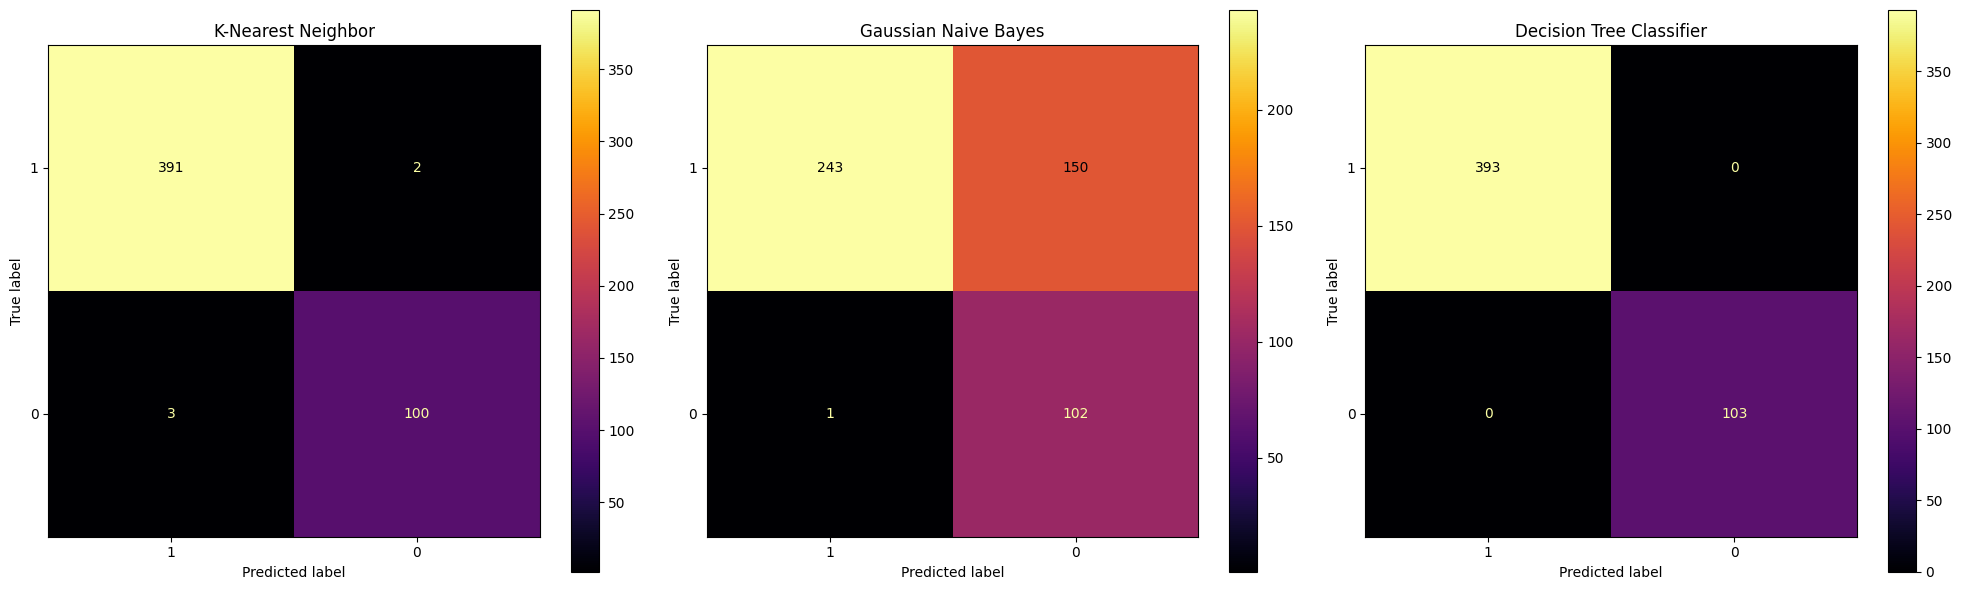

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, model in enumerate(models):
    y_pred = model.predict(x_test_norm)

    cm = confusion_matrix(y_test, y_pred)

    # Reorder confusion matrix so that True Positive is at top-left
    cm_reordered = cm[::-1, ::-1]

    cm_display = ConfusionMatrixDisplay(cm_reordered, display_labels=[1, 0]).plot(ax=axes[i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

plt.tight_layout()
plt.show()


Pada visualisasi tersebut, kita dapat memahami bahwa:

- (1,1) adalah True Positive (TP), yang menunjukkan bahwa model memprediksi kelas positif (rating tinggi) dengan benar, dan prediksi tersebut sesuai dengan kenyataan.

- (0,0) adalah True Negative (TN), yang menunjukkan bahwa model memprediksi kelas negatif (rating rendah) dengan benar, dan prediksi tersebut sesuai dengan kenyataan.

- (1,0) adalah False Negative (FN), yang menunjukkan bahwa model memprediksi kelas negatif (rating rendah) ketika seharusnya kelasnya adalah positif (rating tinggi).

- (0,1) adalah False Positive (FP), yang menunjukkan bahwa model memprediksi kelas positif (rating tinggi) ketika seharusnya kelasnya adalah negatif (rating rendah).


Untuk setiap model:

- **Kelas positif adalah rating tinggi.**

- **Kelas negatif adalah rating rendah.**


Dan hasilnya adalah sebagai berikut:


**Untuk model KNN:**

- TP adalah 391, yang berarti model memprediksi rating tinggi dengan benar.
- TN adalah 100, yang berarti model memprediksi rating rendah dengan benar.


**Untuk model GNB:**

- TP adalah 243, yang berarti model memprediksi rating tinggi dengan benar.
- TN adalah 102, yang berarti model memprediksi rating rendah dengan benar.


**Untuk model DTC:**

- TP adalah 393, yang berarti model memprediksi rating tinggi dengan benar.
- TN adalah 103, yang berarti model memprediksi rating rendah dengan benar.

###ROC-AUC

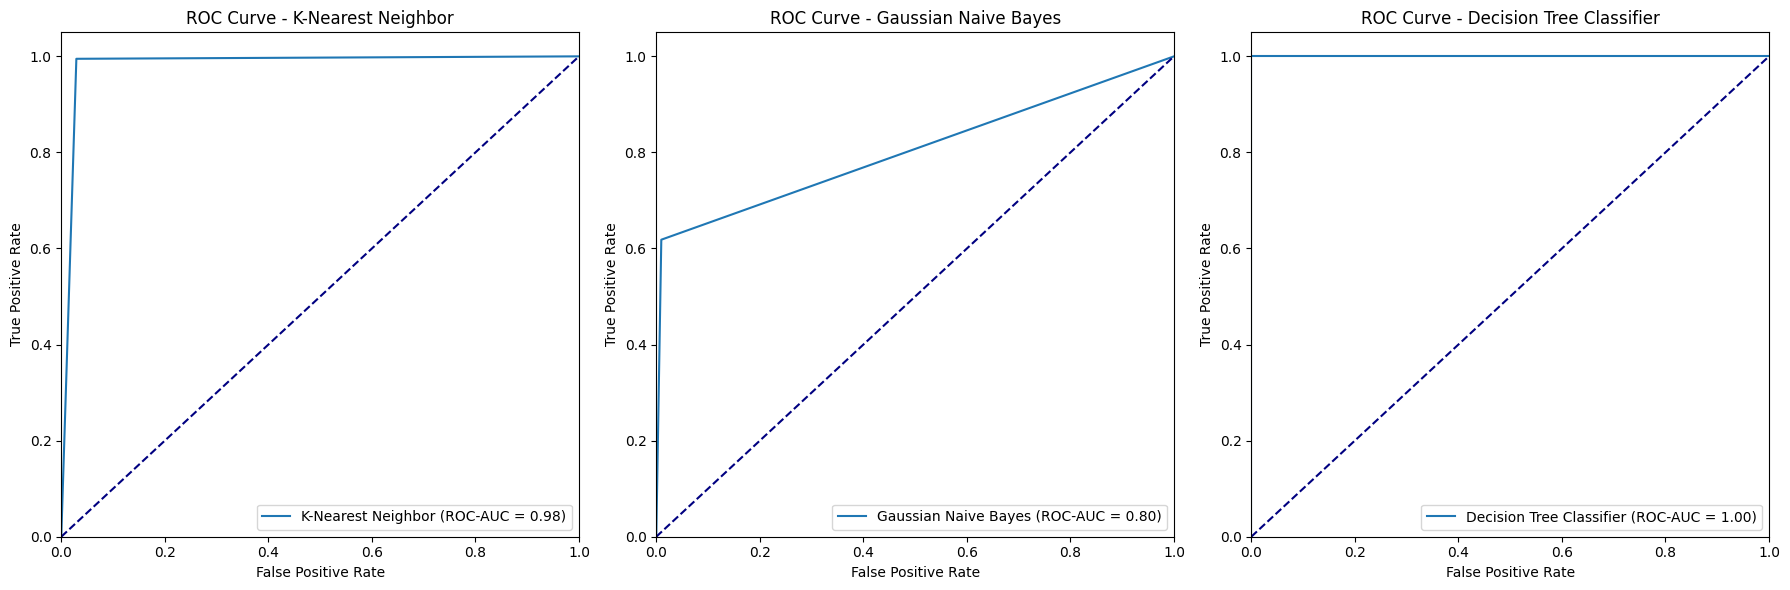

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

1. **K-Nearest Neighbor (KNN)**:
   - ROC-AUC = 0.98
   - Nilai ROC-AUC yang tinggi menunjukkan bahwa model KNN memiliki kinerja yang sangat baik dalam memisahkan antara kelas positif dan negatif. Ini berarti model mampu membedakan dengan baik antara cokelat yang mendapat rating tinggi dan cokelat yang mendapat rating rendah. Kurva ROC KNN cenderung lebih dekat ke sudut kiri atas, yang menunjukkan bahwa model memiliki tingkat True Positive Rate (TPR) yang tinggi pada tingkat False Positive Rate (FPR) yang rendah.

2. **Gaussian Naive Bayes (GNB)**:
   - ROC-AUC = 0.80
   - Meskipun nilai ROC-AUC untuk model GNB lebih rendah daripada KNN dan DTC, namun masih menunjukkan kinerja yang baik. Model GNB mampu memisahkan antara kelas positif dan negatif dengan cukup baik, meskipun tidak sebaik model KNN. Kurva ROC GNB mungkin tidak mendekati sudut kiri atas sejauh kurva ROC KNN, tetapi masih menunjukkan kemampuan model untuk membedakan antara kelas-kelas tersebut.

3. **Decision Tree Classifier (DTC)**:
   - ROC-AUC = 1.00
   - Nilai ROC-AUC maksimum (1.00) menunjukkan bahwa model DTC memiliki kinerja sempurna dalam memisahkan antara kelas positif dan negatif. Ini menandakan bahwa model DTC mampu dengan sempurna membedakan antara cokelat yang mendapat rating tinggi dan cokelat yang mendapat rating rendah. Kurva ROC DTC akan mendekati sudut kiri atas, menunjukkan bahwa model memiliki tingkat True Positive Rate (TPR) yang tinggi pada tingkat False Positive Rate (FPR) yang rendah, dan tidak ada kesalahan klasifikasi yang terjadi.

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model predictions
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

results = {}

for model, name in zip(models, model_names):
    y_pred = model.predict(x_test_norm)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred)

    # Recall (Sensitivity)
    recall = recall_score(y_test, y_pred)

    # F1-Score
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred)

    # Store results
    results[name] = {'Accuracy': acc,
                     'Precision': precision,
                     'Recall': recall,
                     'F1-Score': f1,
                     'ROC-AUC': roc_auc}

# Print results
for name, metrics in results.items():
    print(f"Metrics for {name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

Metrics for K-Nearest Neighbor:
Accuracy: 0.9899193548387096
Precision: 0.9923857868020305
Recall: 0.9949109414758269
F1-Score: 0.9936467598475223
ROC-AUC: 0.982892363941797


Metrics for Gaussian Naive Bayes:
Accuracy: 0.6955645161290323
Precision: 0.9959016393442623
Recall: 0.6183206106870229
F1-Score: 0.7629513343799058
ROC-AUC: 0.8043059364114726


Metrics for Decision Tree Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0




### K-Nearest Neighbor (KNN):
- **Akurasi Tinggi**: Dengan nilai akurasi sebesar 0.9899, model KNN mampu melakukan prediksi dengan tingkat kebenaran yang tinggi.
- **Nilai ROC-AUC Tinggi**: Nilai ROC-AUC yang tinggi, yaitu 0.9829, menunjukkan bahwa model KNN memiliki kemampuan yang baik dalam memisahkan kelas positif dan negatif.
- **Sedikit Kesalahan Klasifikasi**: Dengan sedikit kesalahan klasifikasi, model KNN merupakan pilihan yang baik untuk masalah klasifikasi ini.

### Gaussian Naive Bayes (GNB):
- **Akurasi Rendah, Namun Precision Tinggi**: Meskipun memiliki akurasi yang relatif rendah sebesar 0.6956, model GNB memiliki nilai precision yang tinggi, mencapai 0.9959. Ini menunjukkan bahwa ketika model GNB membuat prediksi positif, prediksinya cenderung benar.
- **Recall Rendah**: Namun, recall yang rendah sebesar 0.6183 menunjukkan bahwa model ini cenderung melewatkan banyak kasus positif yang sebenarnya.

### Decision Tree Classifier (DTC):
- **Kinerja Sempurna**: Model DTC memiliki kinerja yang sempurna dengan nilai akurasi, precision, recall, F1-score, dan ROC-AUC yang semuanya mencapai nilai maksimum. Hal ini menunjukkan bahwa model ini sangat baik dalam memisahkan kelas positif dan negatif, dan tidak ada kesalahan klasifikasi yang terjadi.

**Kesimpulan**

Berdasarkan hasil evaluasi, K-Nearest Neighbor (KNN) menunjukkan kinerja yang baik tanpa kecenderungan overfitting seperti pada Decision Tree Classifier (DTC), yang cenderung menunjukkan kinerja yang mendekati sempurna namun memiliki potensi risiko overfitting yang tinggi. Meskipun Gaussian Naive Bayes (GNB) memiliki akurasi rendah dan tidak optimal untuk kasus ini. Oleh karena itu, diputuskan bahwa KNN dipilih sebagai pilihan terbaik karena memberikan keseimbangan yang baik antara kinerja yang baik dan kemampuan untuk menggeneralisasi pada data baru, tanpa terlalu mendekati sempurna sehingga mengurangi risiko overfitting.

## **Review Proses**

### Cross Validation

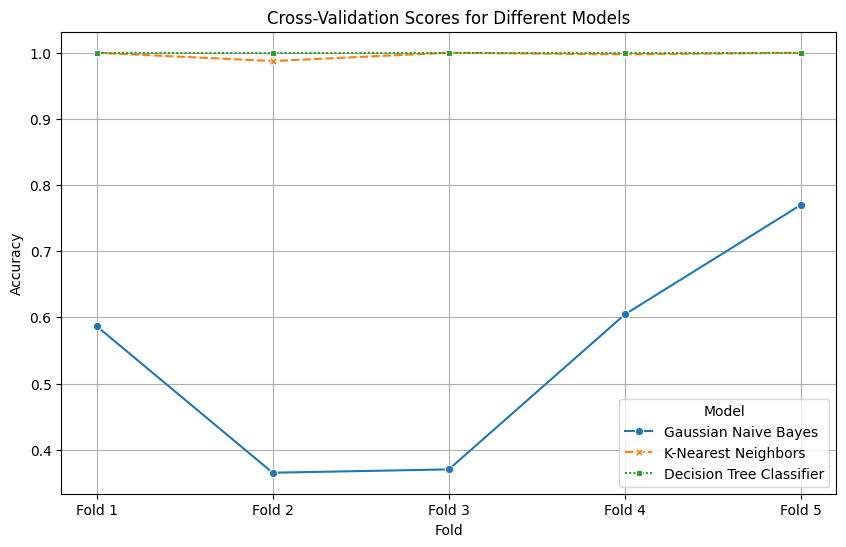

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

### Decision Tree Classifier (DTC):
- Model DTC memiliki akurasi yang tinggi, yaitu 1, di setiap fold (fold 1 hingga fold 5). Ini menunjukkan bahwa model DTC sangat efektif dalam melakukan klasifikasi pada dataset yang diberikan. Konsistensi tingginya kinerja model DTC di setiap percobaan menandakan bahwa model ini memiliki kemampuan yang baik dalam memisahkan kelas-kelas yang berbeda.

### K-Nearest Neighbors (KNN):
- KNN juga memiliki akurasi yang tinggi, yaitu 1, di fold 1, namun mengalami sedikit penurunan di fold 2 dan fold 3, dan kemudian kembali mencapai akurasi 1 di fold 4 hingga 5. Meskipun mengalami penurunan sementara, kinerja KNN masih sangat baik di seluruh lipatan, menunjukkan kestabilan model dalam melakukan klasifikasi pada data yang diberikan.

### Gaussian Naive Bayes (GNB):
- Model GNB mengalami variasi dalam akurasi di setiap fold. Meskipun memiliki akurasi yang tinggi (0.6) di fold 1, namun mengalami penurunan di fold 2 dan fold 3, di mana akurasi turun menjadi di bawah 0.4. Namun, kinerjanya kembali meningkat di fold 5 hampir mencapai nilai akurasi yang baik. Variabilitas ini menunjukkan bahwa model GNB mungkin tidak konsisten dalam memprediksi kelas pada data yang diberikan.


### Feature selections

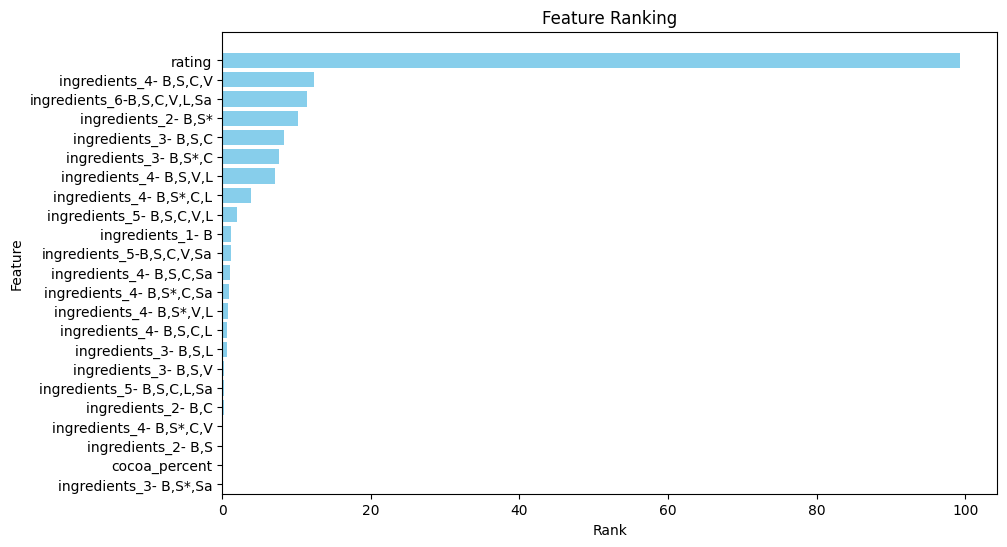

In [43]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Analisis feature selection menyoroti tiga fitur utama yang memainkan peran penting dalam membedakan kelas-kelas pada data, yakni fitur rating, ingredients_4-B,S,C,V dan ingredients_6-B,S,C,V,L,Sa. Peringkat tinggi yang diperoleh oleh ketiga fitur ini menunjukkan bahwa mereka memiliki kontribusi yang signifikan dalam proses klasifikasi. Rating menjadi salah satu penentu utama dalam klasifikasi data, sementara keberadaan atau karakteristik dari fitur ingredients_4-B,S,C,V dan ingredients_6-B,S,C,V,L,Sa juga memiliki dampak yang besar dalam memisahkan kelas-kelas.

## Tuning Hypermater

###GNB

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.0001519911082952933}
Akurasi sebelum tuning: 0.6955645161290323
Akurasi setelah tuning: 0.875


###DTC

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Tentukan grid parameter untuk pencarian
param_grid_dtc = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Buat objek GridSearchCV
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, cv=5)

# Lakukan pencarian parameter terbaik
grid_search_dtc.fit(x_train_norm, y_train)

# Tampilkan parameter terbaik
print("Parameter terbaik DTC:", grid_search_dtc.best_params_)

# Buat prediksi dengan model terbaik
y_pred_tuned_dtc = grid_search_dtc.best_estimator_.predict(x_test_norm)

# Evaluasi akurasi sebelum tuning (setelah dilakukan fit)
dtc.fit(x_train_norm, y_train)  # Melakukan fit terlebih dahulu
acc_before_tuning_dtc = dtc.score(x_test_norm, y_test)
print("Akurasi DTC sebelum tuning:", acc_before_tuning_dtc)

# Evaluasi akurasi setelah tuning
acc_after_tuning_dtc = grid_search_dtc.best_estimator_.score(x_test_norm, y_test)
print("Akurasi DTC setelah tuning:", acc_after_tuning_dtc)


Parameter terbaik DTC: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi DTC sebelum tuning: 1.0
Akurasi DTC setelah tuning: 1.0


###KNN

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definisikan parameter grid untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Buat objek GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)

# Lakukan pencarian parameter terbaik menggunakan data pelatihan
grid_search_knn.fit(x_train_norm, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search_knn.best_params_)

# Gunakan model KNN terbaik dari hasil GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Evaluasi akurasi sebelum tuning
acc_before_tuning_knn = best_knn_model.score(x_test_norm, y_test)
print("Akurasi KNN sebelum tuning:", acc_before_tuning_knn)

# Evaluasi akurasi setelah tuning
acc_after_tuning_knn = grid_search_knn.best_score_
print("Akurasi KNN setelah tuning:", acc_after_tuning_knn)


Parameter terbaik: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Akurasi KNN sebelum tuning: 0.9899193548387096
Akurasi KNN setelah tuning: 0.996977329974811


## **Determain Next Steps**

Saya melakukan perbaikan pada dataset dengan mengubah label dari "rating" menjadi "rating_category" untuk memudahkan pemahaman. Selanjutnya, saya melakukan perhitungan matriks evaluasi dan metrik pengukuran untuk seluruh algoritma pemodelan yang digunakan. Hasilnya, saya memilih model yang paling optimal berdasarkan evaluasi tersebut. Setelah itu, saya melakukan validasi silang pada semua algoritma untuk memastikan bahwa algoritma yang dipilih memang yang paling optimal.


Selanjutnya, saya menganalisis fitur-fitur yang paling berpengaruh dalam analisis saya melalui proses feature selection. Kemudian, saya melakukan tuning hyperparameter pada algoritma yang terpilih untuk melihat perbandingan kinerja sebelum dan sesudah dilakukan tuning.


Berdasarkan proses ini, saya menyimpulkan bahwa saya dapat melanjutkan ke tahap berikutnya dengan keyakinan bahwa saya telah melakukan evaluasi menyeluruh dan memilih model yang paling optimal untuk analisis saya.